<a href="https://colab.research.google.com/github/CodeGreatCommander/CourseOfStudy/blob/main/COS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyPDF2
from PyPDF2 import PdfReader
def get_courses(dept):
  def extract_pages(text):
    t=[]
    with open("cos.pdf","rb") as pd:
      pdf = PdfReader(pd)
      for page_num in range(len(pdf.pages)):
        page=pdf.pages[page_num].extract_text()
        f=True
        for i in text:
          if i not in page:
            f=False
            break
        if(f):t.append(page)
    return t
  text=extract_pages([dept,"Institute Core"])
  tC=[": Basic Sciences","Institute Core: Engineering Arts and Sciences","Programme-Linked Basic","Departmental Core"]
  print(text)
  text_1=text[0].split("\n")
  f=False
  last=""
  map={}
  def check(s,x):
    f=False
    for a in s:
      if(a in x):
        return a
    return False
  for x in text_1:
    if(" Total Credits" in x):
      f=False
    if(f and x[0]!=" "):
      map[last].append(x[:6])
    p=check(tC,x)
    if(p!=False):
      f=True
      last=p
      map[p]=[]
  return map

In [2]:
departments=["MT1","MT6","CS1","CS5","EE1","PH1","CE1"]
# departments=["MT1"]
loc={}
for x in departments:
  loc[x]=get_courses(x)

['71The overall Credit Structure\nCourse Category Credits\nInstitute Core Courses\n Basic Sciences (BS)  24\n Engineering Arts and Science (EAS)  19\n Humanities and Social Sciences (HuSS)  15\nProgramme-linked Courses   12.5\nDepartmental Courses\n Departmental Core   63.5\n Departmental Electives  12\nOpen Category Courses  10\nTotal Graded Credit requirement  156\nNon Graded Units  11\nInstitute Core : Basic Sciences\nCML101 Introduction to Chemistry 3 1 0 4\nCMP100 Chemistry Laboratory 0 0 4 2\nMTL100 Calculus 3 1 0 4\nMTL101 Linear Algebra and Differential Equations 3 1 0 4\nPYL101 Electromagnetism & Quantum Mechanics   3 1 0 4\nPYP100 Physics Laboratory 0 0 4 2\nSBL100 Introductory Biology for Engineers 3 0 2 4\n Total Credits    24 \nInstitute Core: Engineering Arts and Sciences\nAPL100 Engineering Mechanics 3 1 0 4\nCOL100 Introduction to Computer Science 3 0 2 4\nCVL100 Environmental Science 2 0 0 2\nELL101 Introduction to Electrical Engineering 3 1 0 4\nELP101 Introduction to

In [3]:
def write_nested_dict_to_file(data, file, indent=0):
    for key, value in data.items():
        if isinstance(value, dict):
            # If the value is another dictionary, recursively write it
            file.write(' ' * indent + f'{key}:\n')
            write_nested_dict_to_file(value, file, indent + 4)
        else:
            # If the value is not a dictionary, write the key-value pair
            file.write(' ' * indent + f'{key}: {value}\n')

In [4]:
with open('output_loc.txt', 'w') as file:
    write_nested_dict_to_file(loc, file)

In [5]:
ls=set({})
for x in loc:
  for a in loc[x]:
    for q in loc[x][a]:
      ls.add(q)
print(ls)

{'CMP100', 'CVL111', 'MTL105', 'COL362', 'CVP342', 'CVL381', 'COP290', 'MTL101', 'MTL411', 'CVD411', 'COL352', 'PYP221', 'PYL209', 'ELL205', 'CVL141', 'CVP222', 'CVL342', 'PYL125', 'ELP311', 'APL100', 'MTL458', 'PYP100', 'CVL245', 'MCP101', 'CVL341', 'COL351', 'COD492', 'COL331', 'ELP305', 'ELL202', 'ELL305', 'PYL101', 'MTL180', 'MTL390', 'PYL208', 'APL107', 'SBL100', 'PYD411', 'CVP281', 'CVL282', 'MTL103', 'MTD411', 'ELL201', 'ELP302', 'MCP100', 'MTL122', 'ELL211', 'CML102', 'MTL445', 'ELL311', 'MTL342', 'CVL121', 'CVL212', 'ELL225', 'PYL204', 'CVP242', 'APL108', 'PYP111', 'MCL142', 'COL202', 'PYP212', 'PYL202', 'ELL302', 'CVL261', 'CVP441', 'COL100', 'MTL107', 'ELP225', 'ELL212', 'PYL121', 'ELL101', 'ELP101', 'COL333', 'CVL222', 'PYL122', 'PYP222', 'PYL205', 'CVP243', 'COL106', 'ELL203', 'PYL103', 'COL216', 'CVP121', 'MTL104', 'MTL100', 'ELL304', 'ELP212', 'PYL102', 'PYL123', 'CVL242', 'CML101', 'CVP321', 'MTL782', 'CVL243', 'CVL100', 'CVP261', 'ELD411', 'CVL321', 'COD490', 'CVL281',

In [6]:
def get_pre_req(ls):
  mp={}
  for x in ls:mp[x]=""
  with open("cos.pdf","rb") as pd:
      pdf = PdfReader(pd)
      for page_num in range(len(pdf.pages)):
        page=pdf.pages[page_num].extract_text()
        page=page.split("\n")
        lis=[]
        for q in range(len(page)):
          if("Pre-requisite(s)" in page[q]):
            for a in ls:
              if(q>1 and a in page[q-2]):
                mp[a]=page[q]
  return mp;

In [7]:
pre_req=get_pre_req(ls)

In [8]:
print(pre_req)

{'CMP100': '', 'CVL111': '', 'MTL105': '', 'COL362': 'Pre-requisite(s): COL106', 'CVP342': '', 'CVL381': 'Pre-requisite(s): CVL281 and CVL282', 'COP290': 'Pre-requisite(s): COL 106', 'MTL101': '', 'MTL411': 'Pre-requisite(s): MTL104 and MTL122', 'CVD411': '', 'COL352': '', 'PYP221': 'Pre-requisite(s): PYL114', 'PYL209': '', 'ELL205': '', 'CVL141': '', 'CVP222': 'Pre-requisite(s): CVL222 or concurrent with CVL222', 'CVL342': 'Pre-requisite(s): CVL242', 'PYL125': '', 'ELP311': 'Pre-requisite(s): ELL311', 'APL100': '', 'MTL458': 'Pre-requisite(s): MTL342', 'PYP100': '', 'CVL245': 'Pre-requisite(s): EC35', 'MCP101': '', 'CVL341': 'Pre-requisite(s): CVL242', 'COL351': 'Pre-requisite(s): COL106', 'COD492': 'Pre-requisite(s): EC 100', 'COL331': 'Pre-requisite(s): COL106 COP290', 'ELP305': '', 'ELL202': 'Pre-requisite(s): ELL101', 'ELL305': 'Pre-requisite(s): ELL201', 'PYL101': '', 'MTL180': '', 'MTL390': 'Pre-requisite(s): MTL106', 'PYL208': '', 'APL107': 'Pre-requisite(s): APL100', 'SBL100':

In [9]:
cpre_req={}
for a in pre_req:
  b=pre_req[a]
  if(b==''):cpre_req[a]=[];continue
  b=b[17:]
  if(","in b):b=b.split(",")
  elif("or"in b):b=b.split("or")
  elif("and"in b):b=b.split("and")
  else: b=[b]
  for i in range(len(b)):
    b[i]=b[i].strip()
    if("concurrent with "in b[i].lower()):b[i]=b[i][len("concurrent with "):]
  cpre_req[a]=b
print(cpre_req)

{'CMP100': [], 'CVL111': [], 'MTL105': [], 'COL362': ['COL106'], 'CVP342': [], 'CVL381': ['CVL281', 'CVL282'], 'COP290': ['COL 106'], 'MTL101': [], 'MTL411': ['MTL104', 'MTL122'], 'CVD411': [], 'COL352': [], 'PYP221': ['PYL114'], 'PYL209': [], 'ELL205': [], 'CVL141': [], 'CVP222': ['CVL222', 'CVL222'], 'CVL342': ['CVL242'], 'PYL125': [], 'ELP311': ['ELL311'], 'APL100': [], 'MTL458': ['MTL342'], 'PYP100': [], 'CVL245': ['EC35'], 'MCP101': [], 'CVL341': ['CVL242'], 'COL351': ['COL106'], 'COD492': ['EC 100'], 'COL331': ['COL106 COP290'], 'ELP305': [], 'ELL202': ['ELL101'], 'ELL305': ['ELL201'], 'PYL101': [], 'MTL180': [], 'MTL390': ['MTL106'], 'PYL208': [], 'APL107': ['APL100'], 'SBL100': [], 'PYD411': [], 'CVP281': ['CVL281', 'CVL281'], 'CVL282': ['APL107'], 'MTL103': [], 'MTD411': [], 'ELL201': ['ELL101'], 'ELP302': ['ELL302'], 'MCP100': [], 'MTL122': ['MTL100'], 'ELL211': ['ELL101', 'PYL101'], 'CML102': [], 'MTL445': [], 'ELL311': ['ELL205'], 'MTL342': ['MTL180'], 'CVL121': [], 'CVL212

In [10]:
print(loc["MT1"])

{'Departmental Core': ['ELL305', 'ELP305', 'MTL102', 'MTL103', 'MTL104', 'MTL105', 'MTL106', 'MTL107', 'MTL122', 'MTL180', 'MTP290', 'MTL342', 'MTL390', 'MTD411', 'MTL421', 'MTL445', 'MTL458', 'MTL782', 'MTL783'], ': Basic Sciences': ['CML101', 'CMP100', 'MTL100', 'MTL101', 'PYL101', 'PYP100', 'SBL100'], 'Institute Core: Engineering Arts and Sciences': ['APL100', 'COL100', 'CVL100', 'ELL101', 'ELP101', 'MCP100', 'MCP101'], 'Programme-Linked Basic': ['COL106', 'ELL201', 'PYL102']}


In [11]:
import pandas as pd
import numpy as np
def add_cour(ls):
  ds=pd.read_csv("Courses_Offered.csv")
  ds=ds.values
  ds=ds[4:]
  slot={}
  for x in ds:
    if isinstance(x[0], str) and x[0]!="S.No" and x[0]!="Department    :":
      course=x[1][-6:]
      if course in ls:
        slot[course]=x[3]
  color_map = {
    'A': 'red',
    'B': 'blue',
    'C': 'green',
    'D': 'orange',
    'E': 'purple',
    'F': 'pink',
    'G': 'cyan',
    'H': 'magenta',
    'I': 'yellow',
    'J': 'lime',
    'K': 'teal',
    'L': 'lavender',
    'M': 'brown',
    'N': 'gray',
    'O': 'olive',
    'P': 'gold',
    'Q': 'silver',
    'AA': 'violet',
    'AE': 'indigo',
    'T': 'turquoise',
    'AB': 'maroon',
    'V': 'crimson',
    'W': 'navy',
    'X': 'azure',
    'Y': 'beige',
    'AF': 'khaki'
  }
  colors=[]
  for x in ls:
    # if x in slot:
    #   print(x,slot[x])
    if x in slot:
      colors.append(color_map[slot[x]])
    else:
      colors.append("white")

  return colors


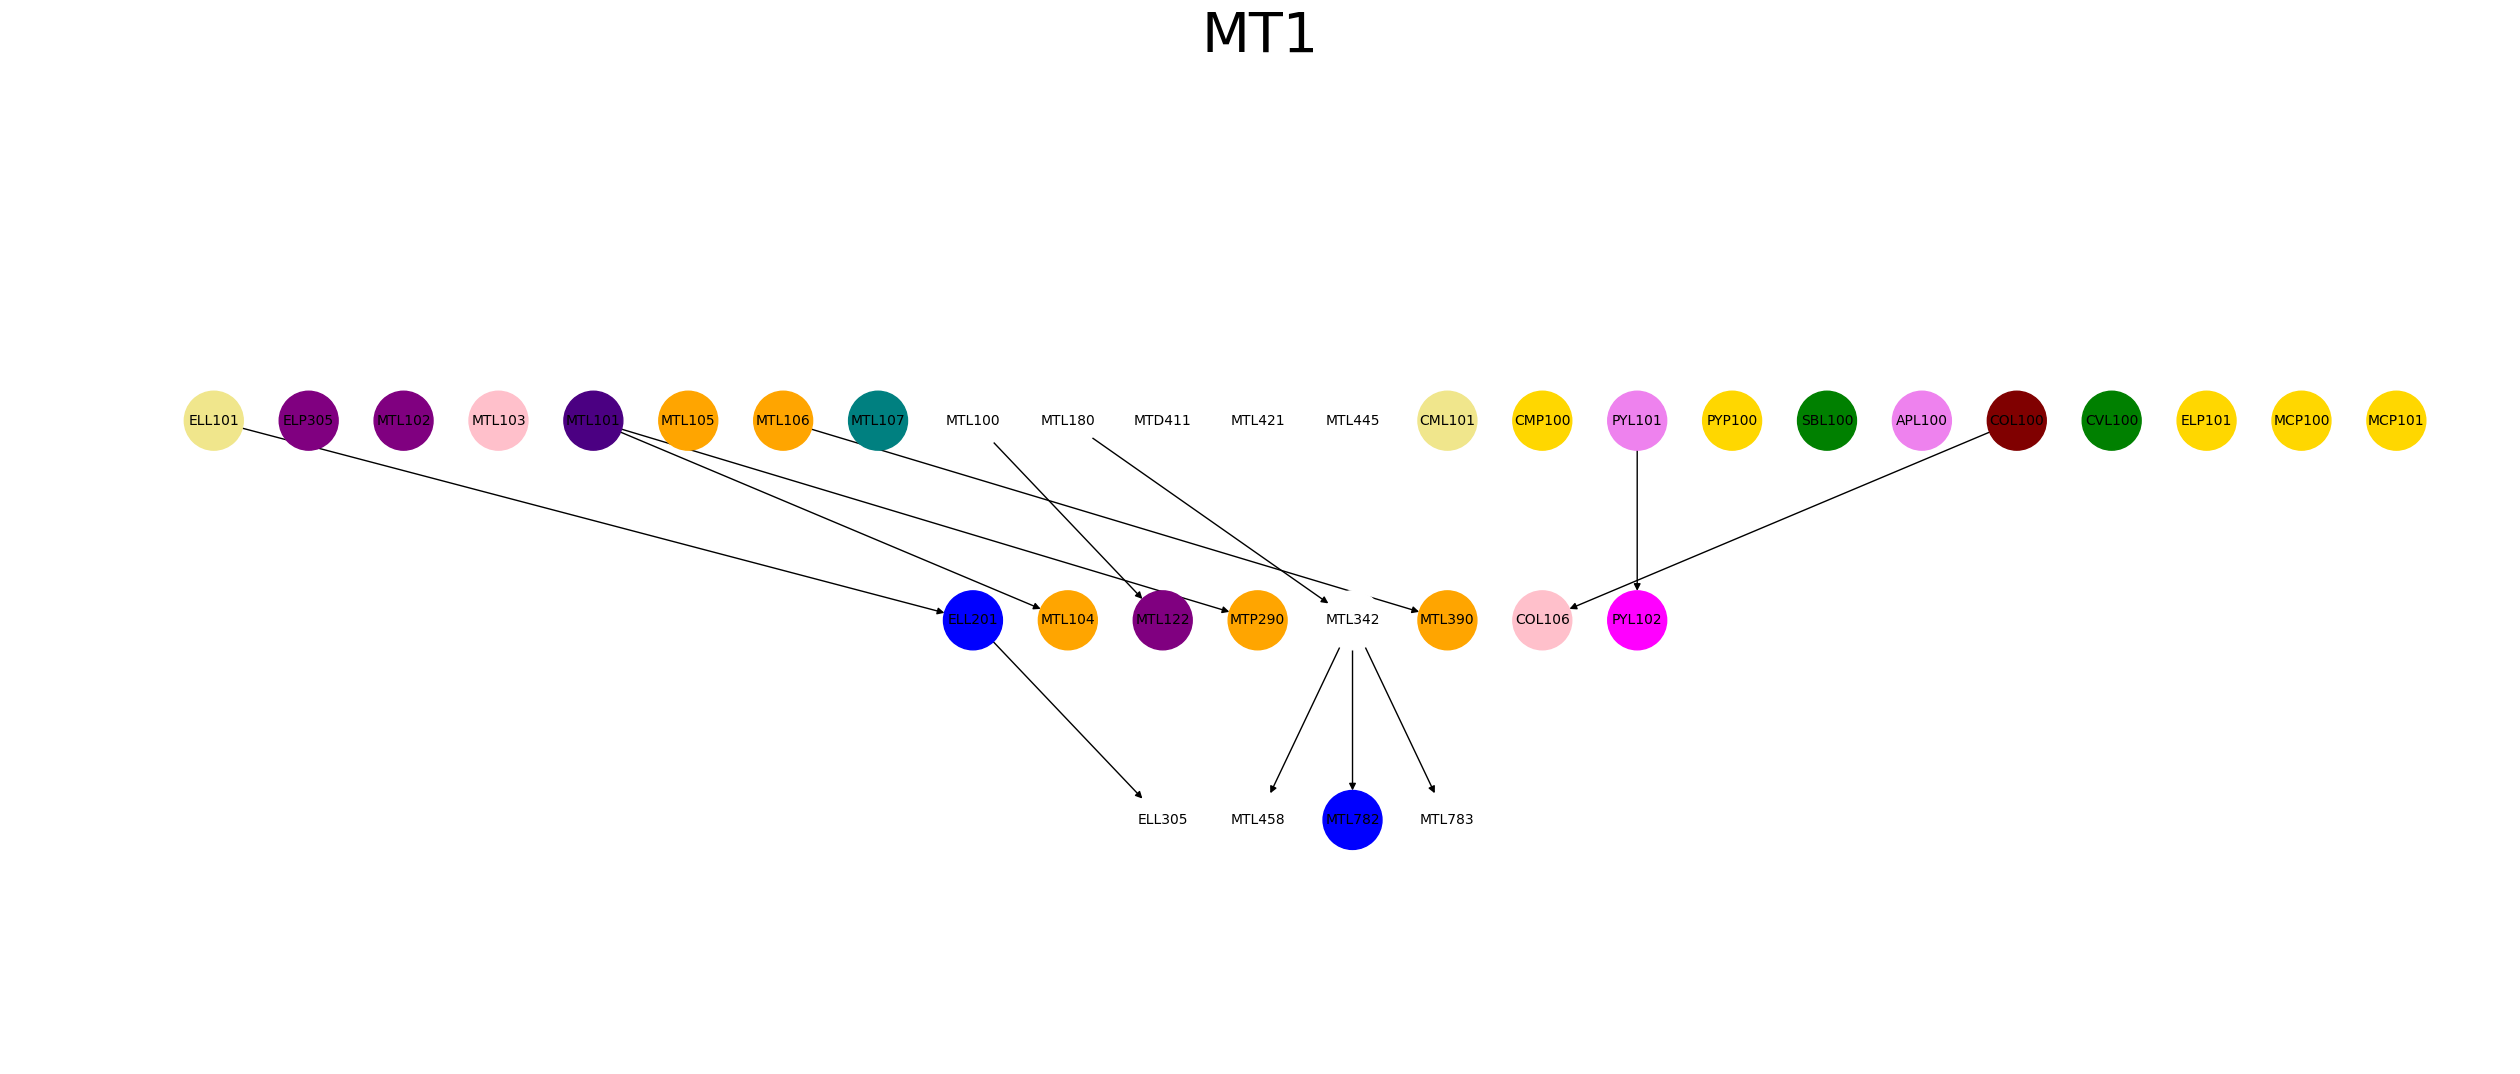

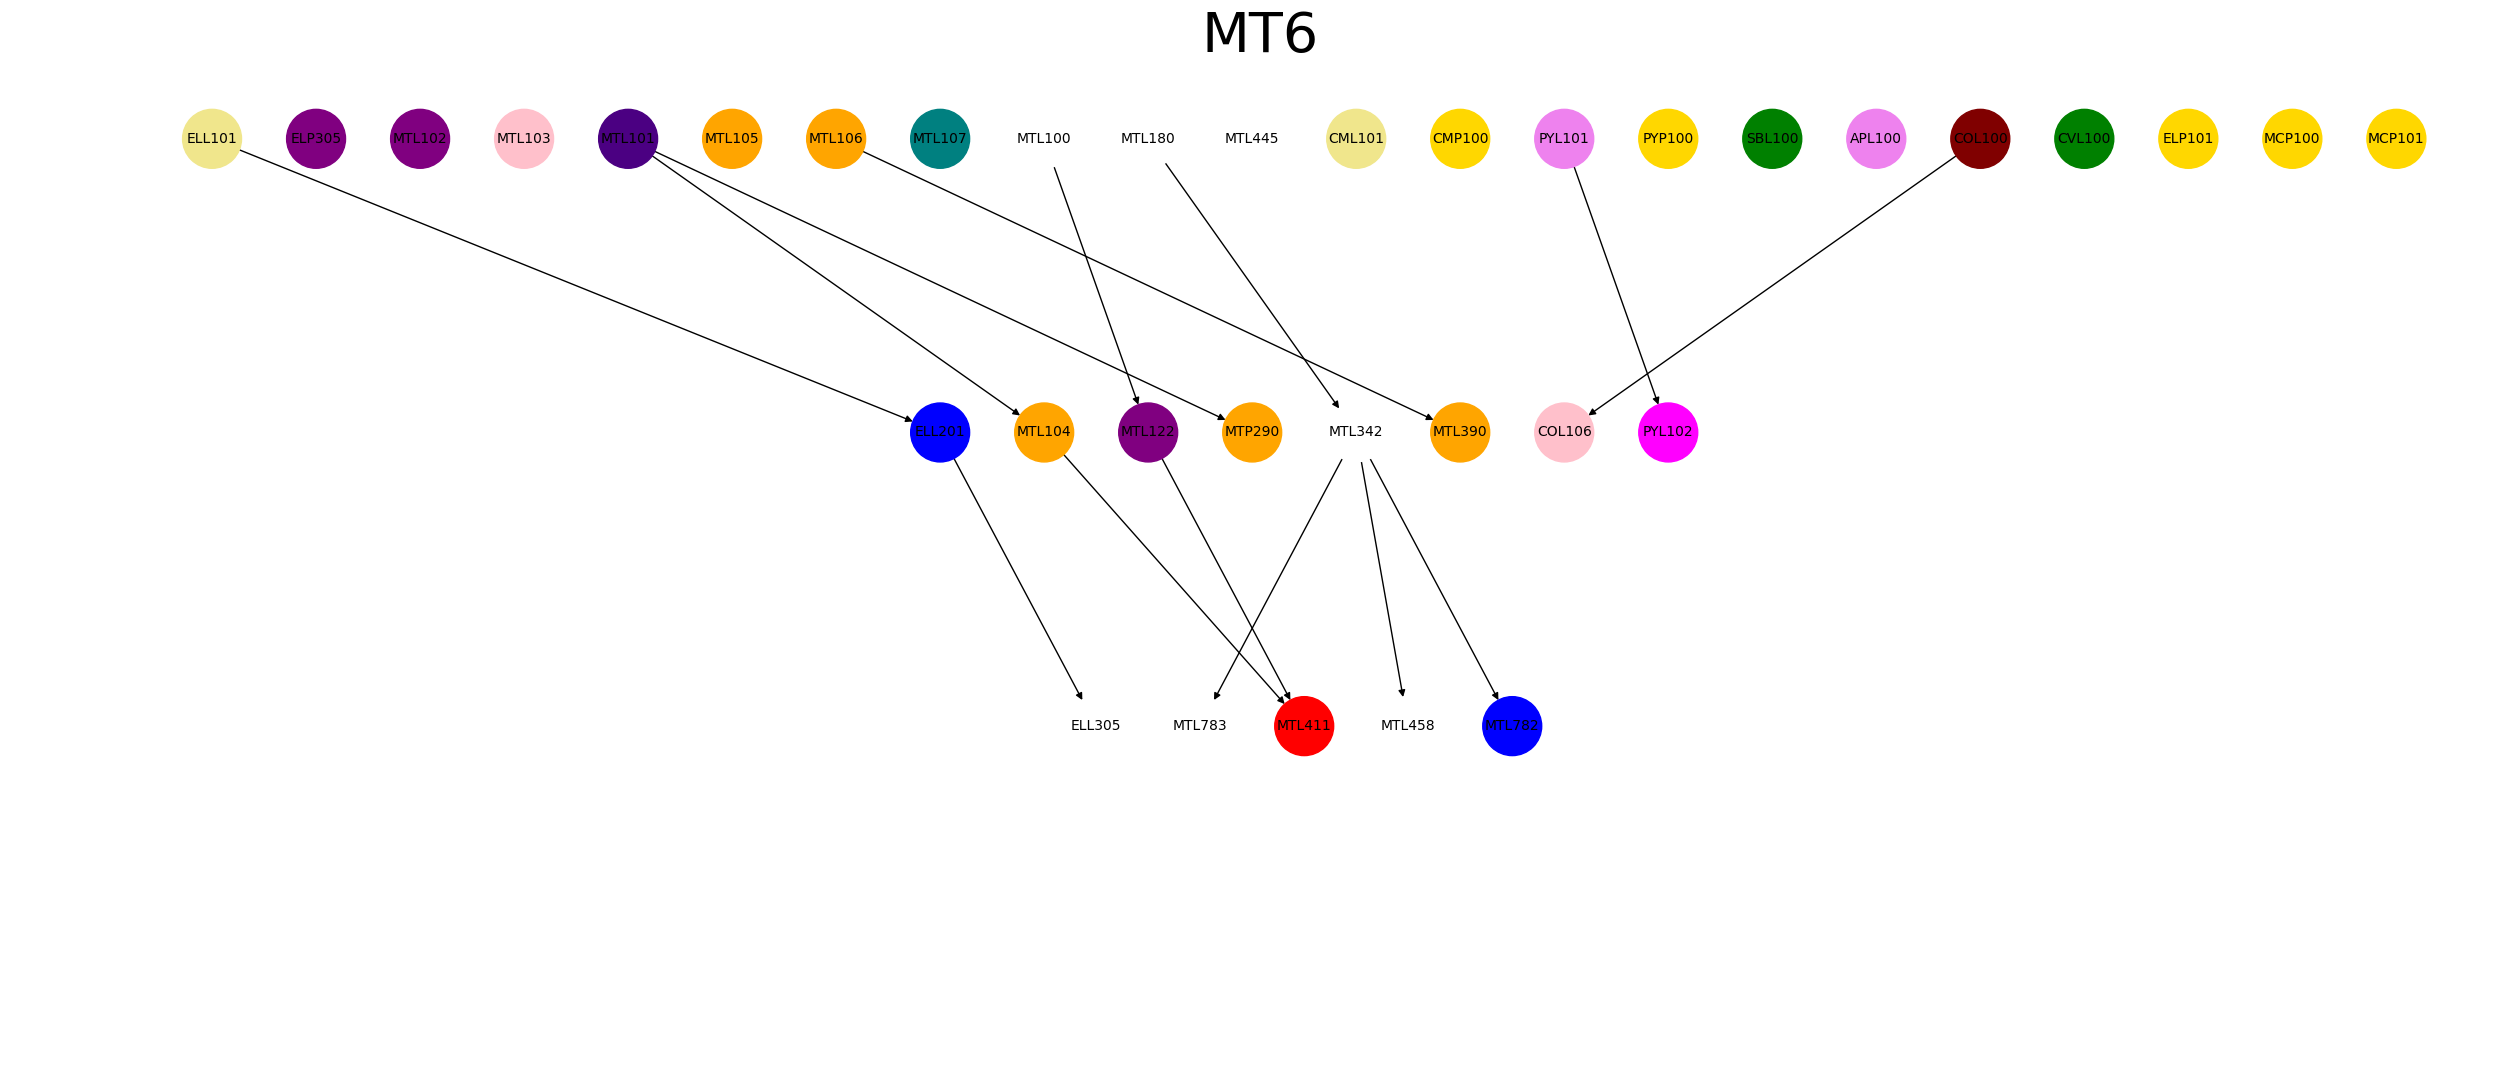

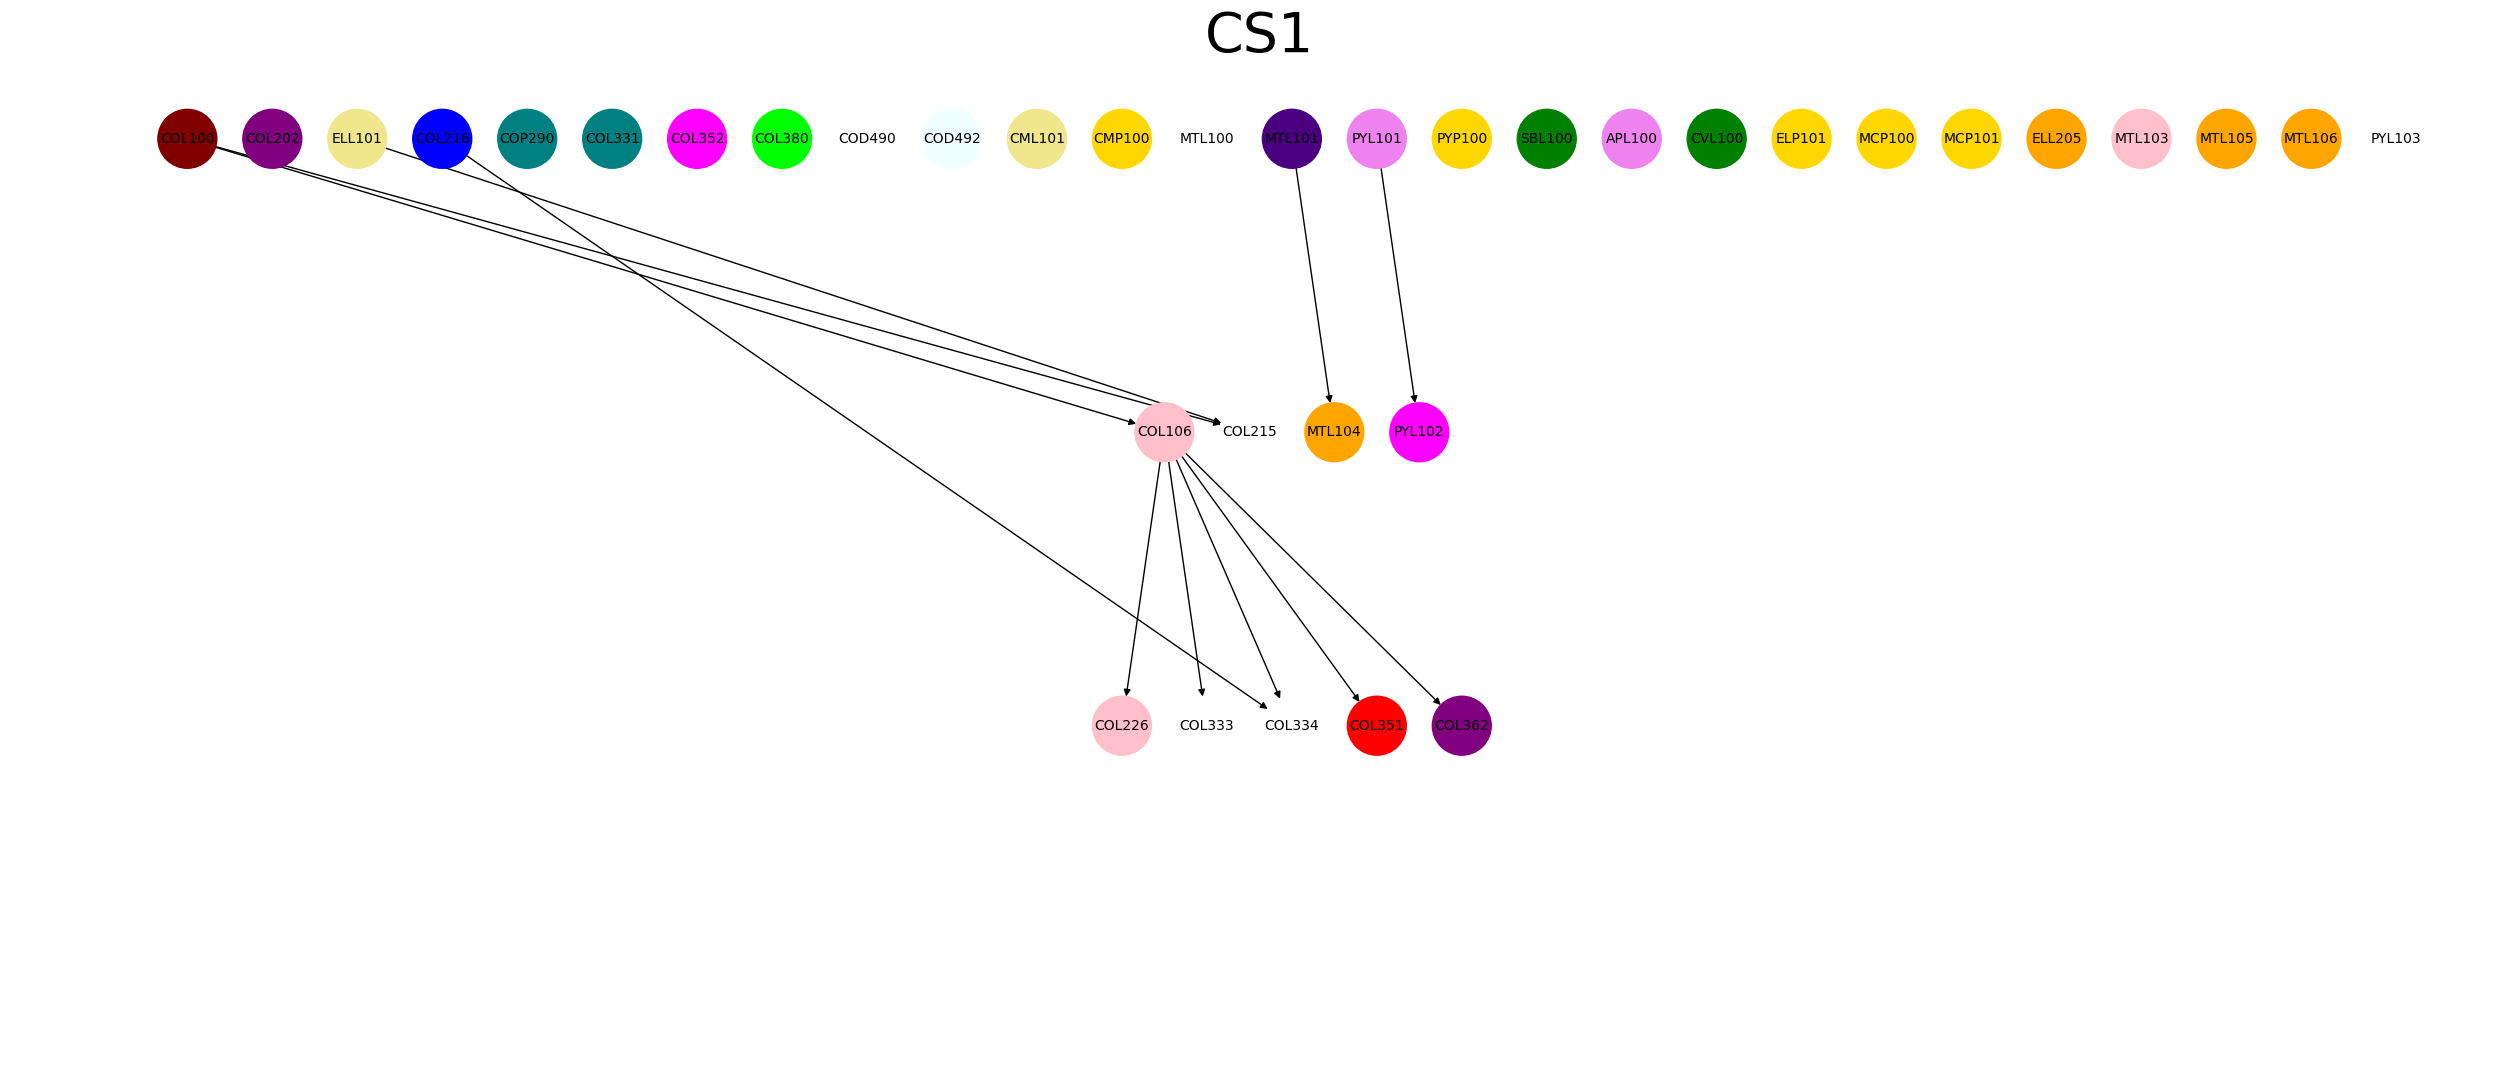

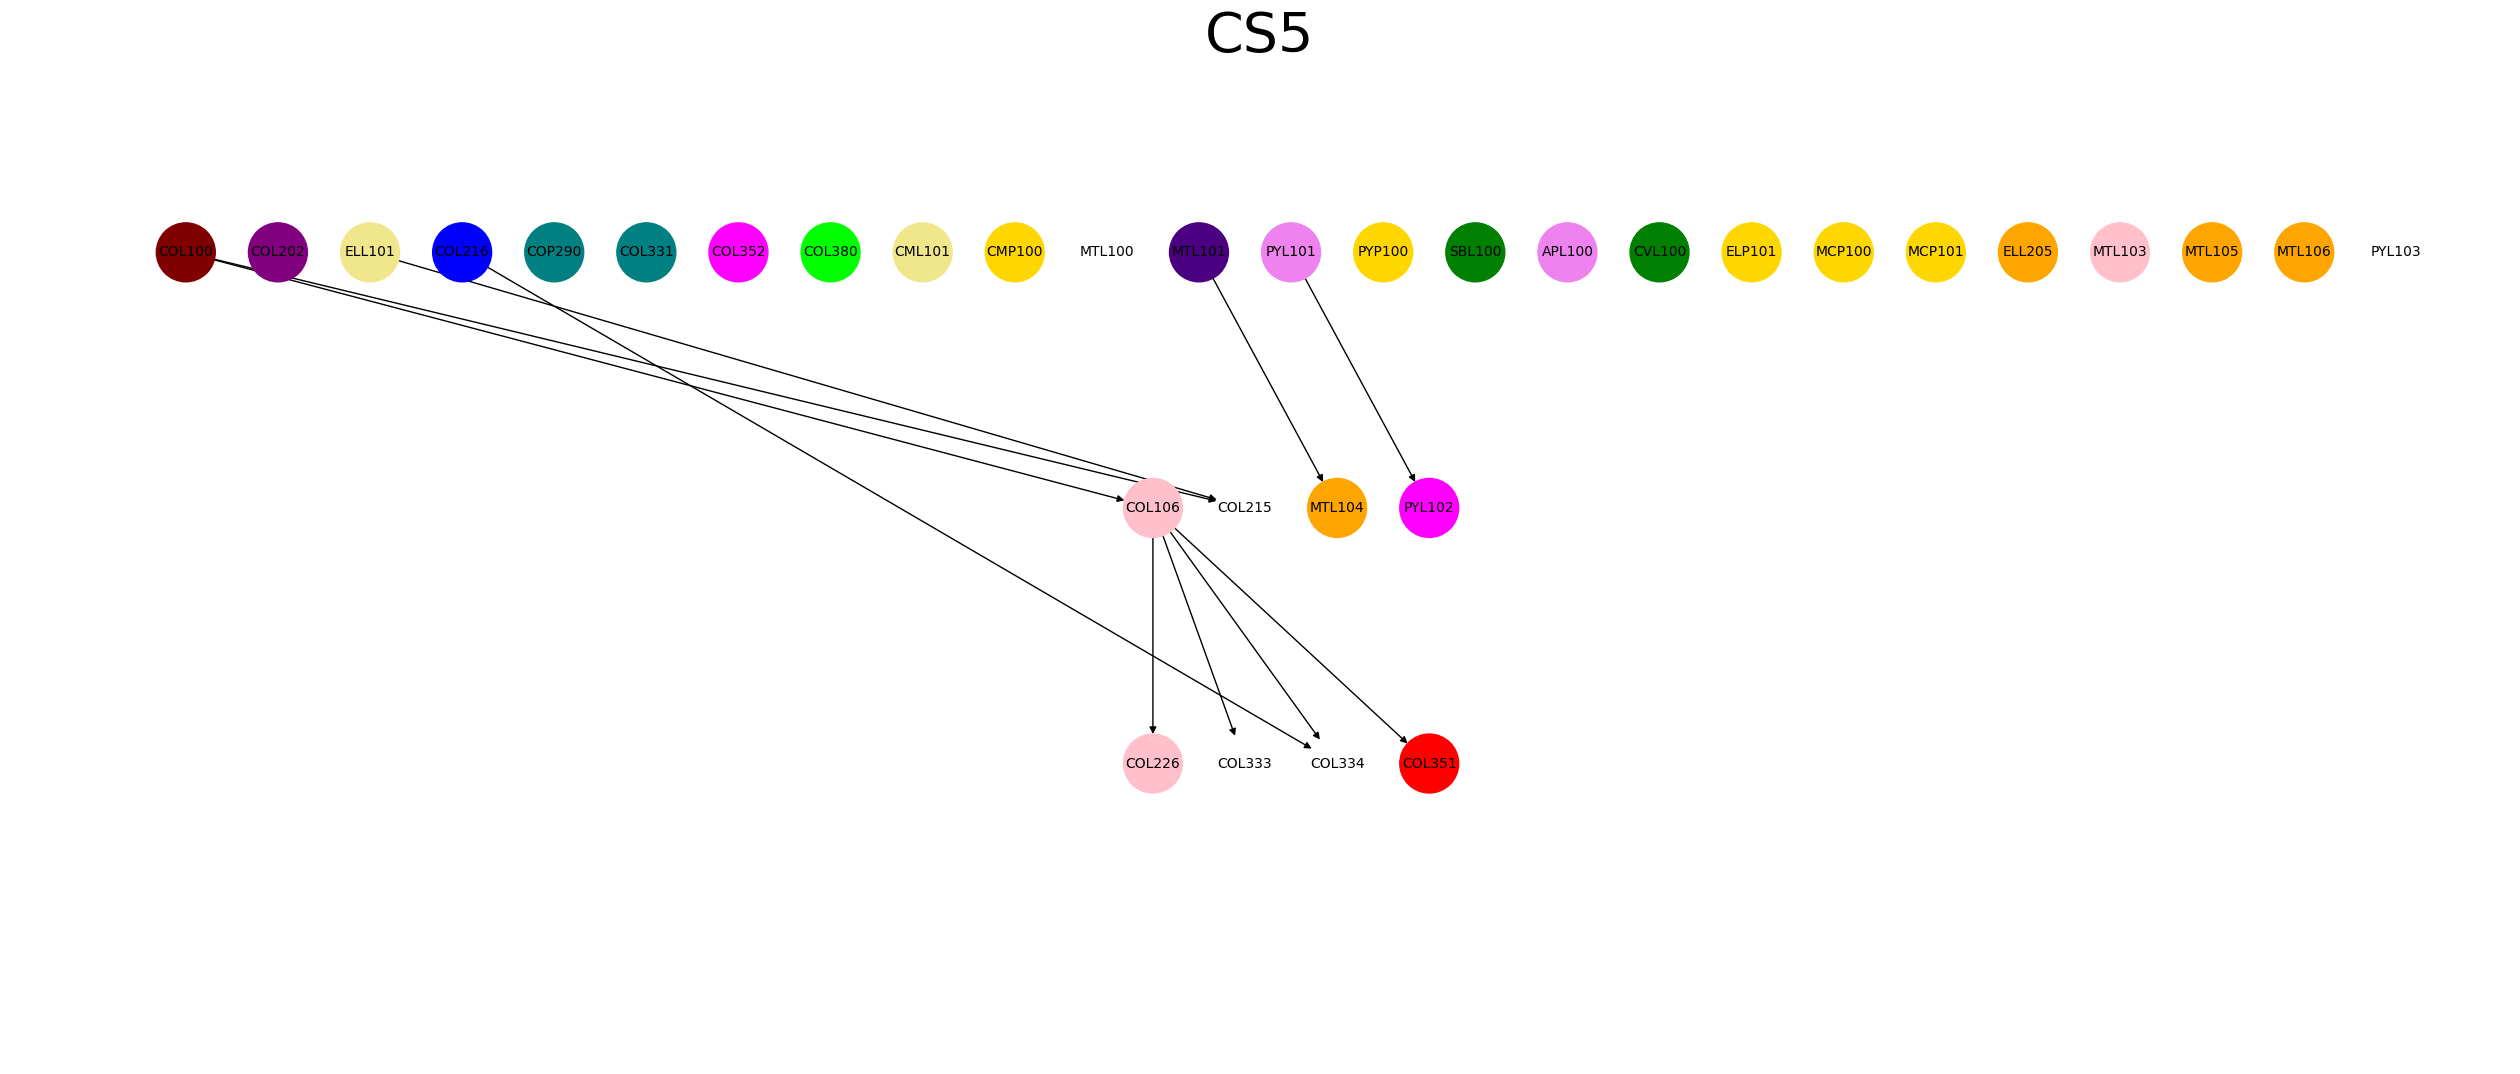

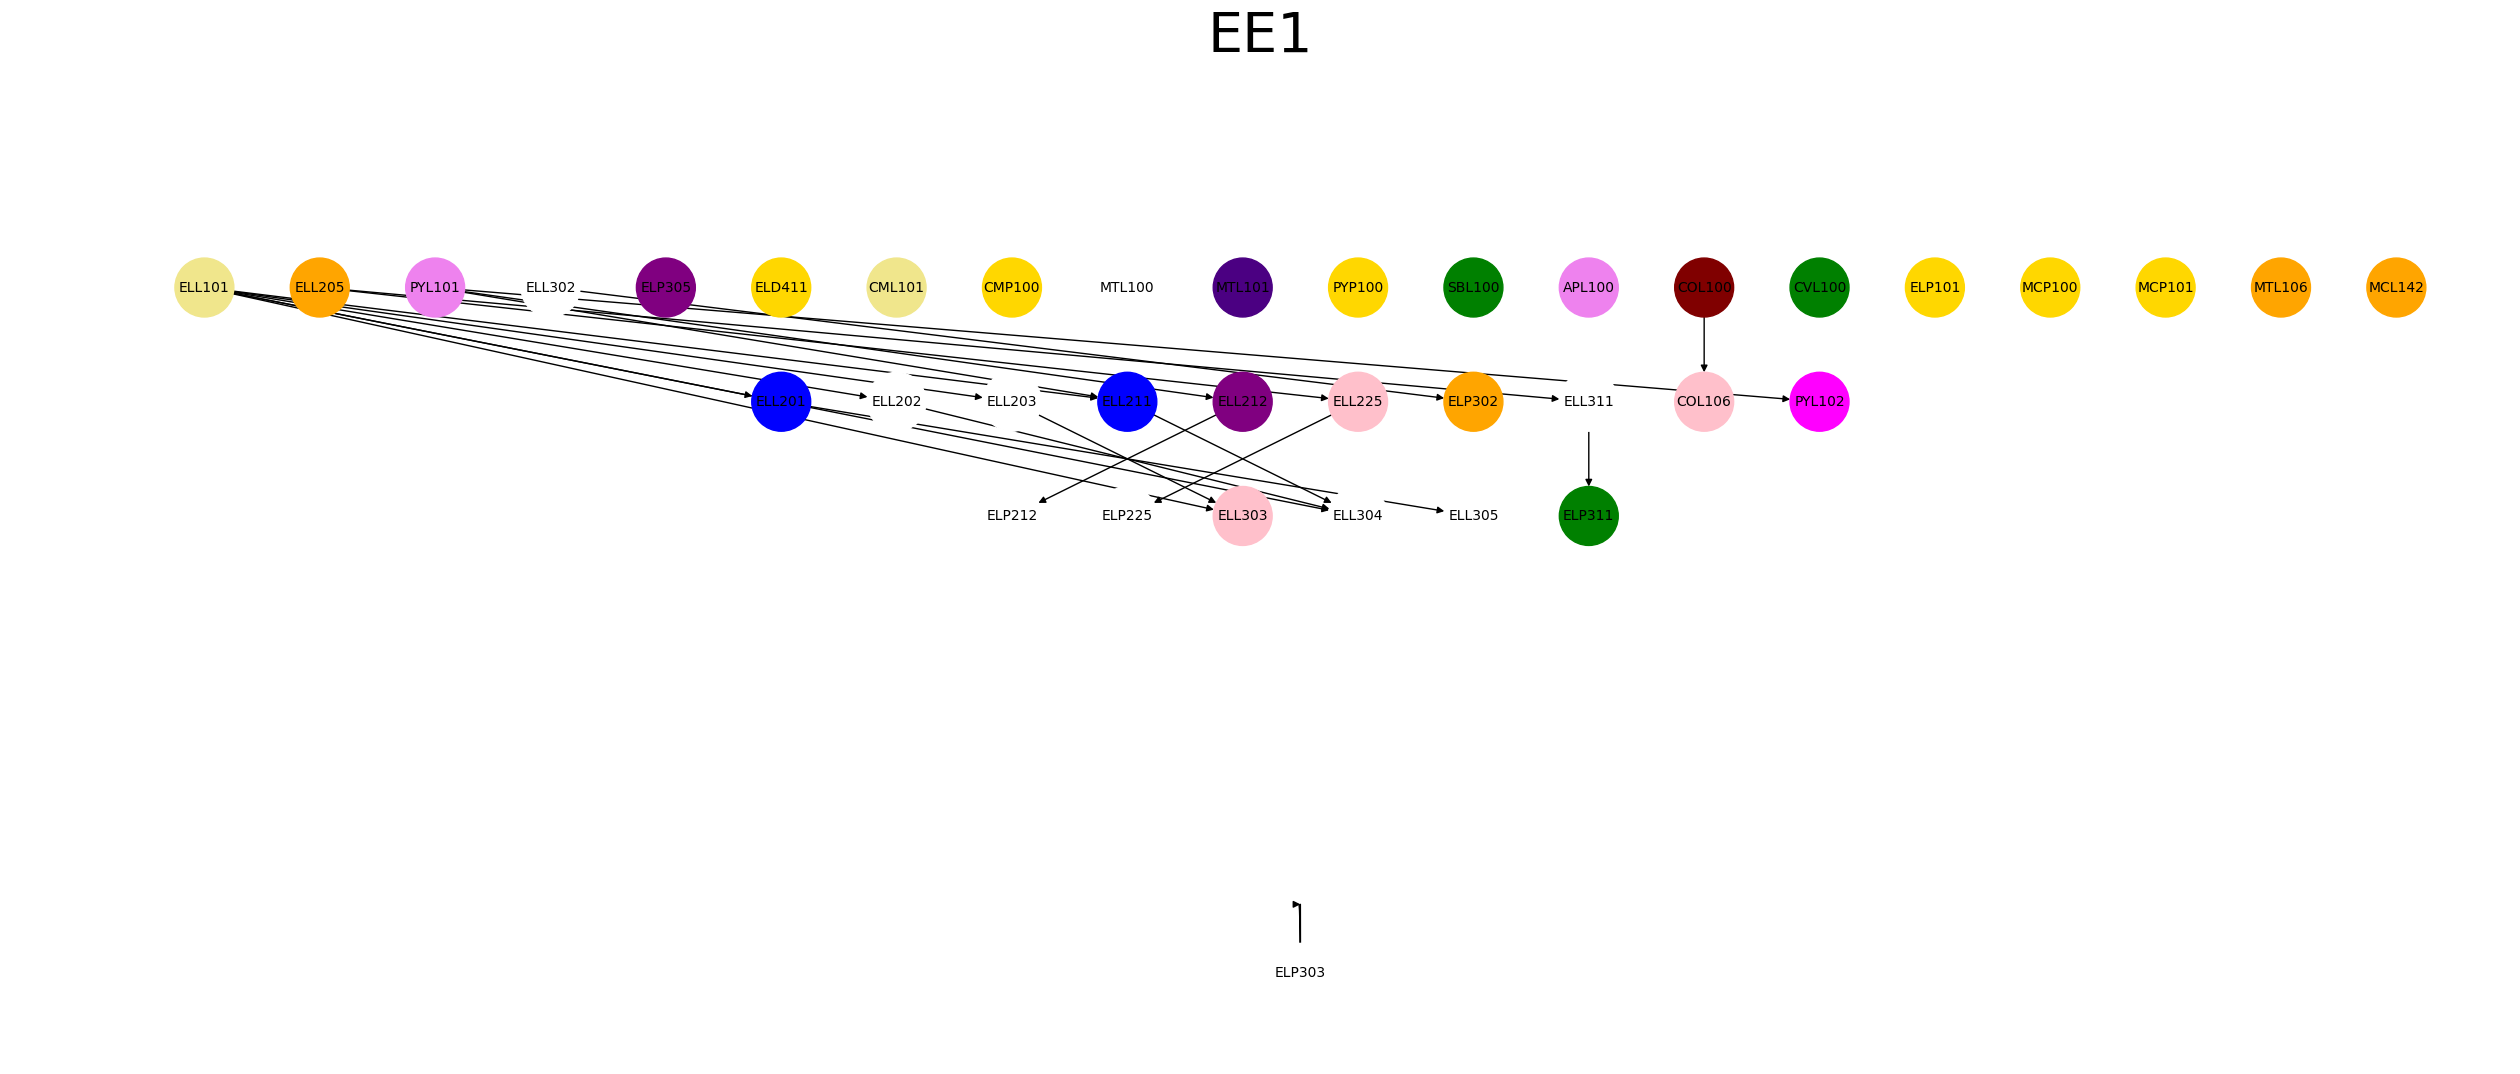

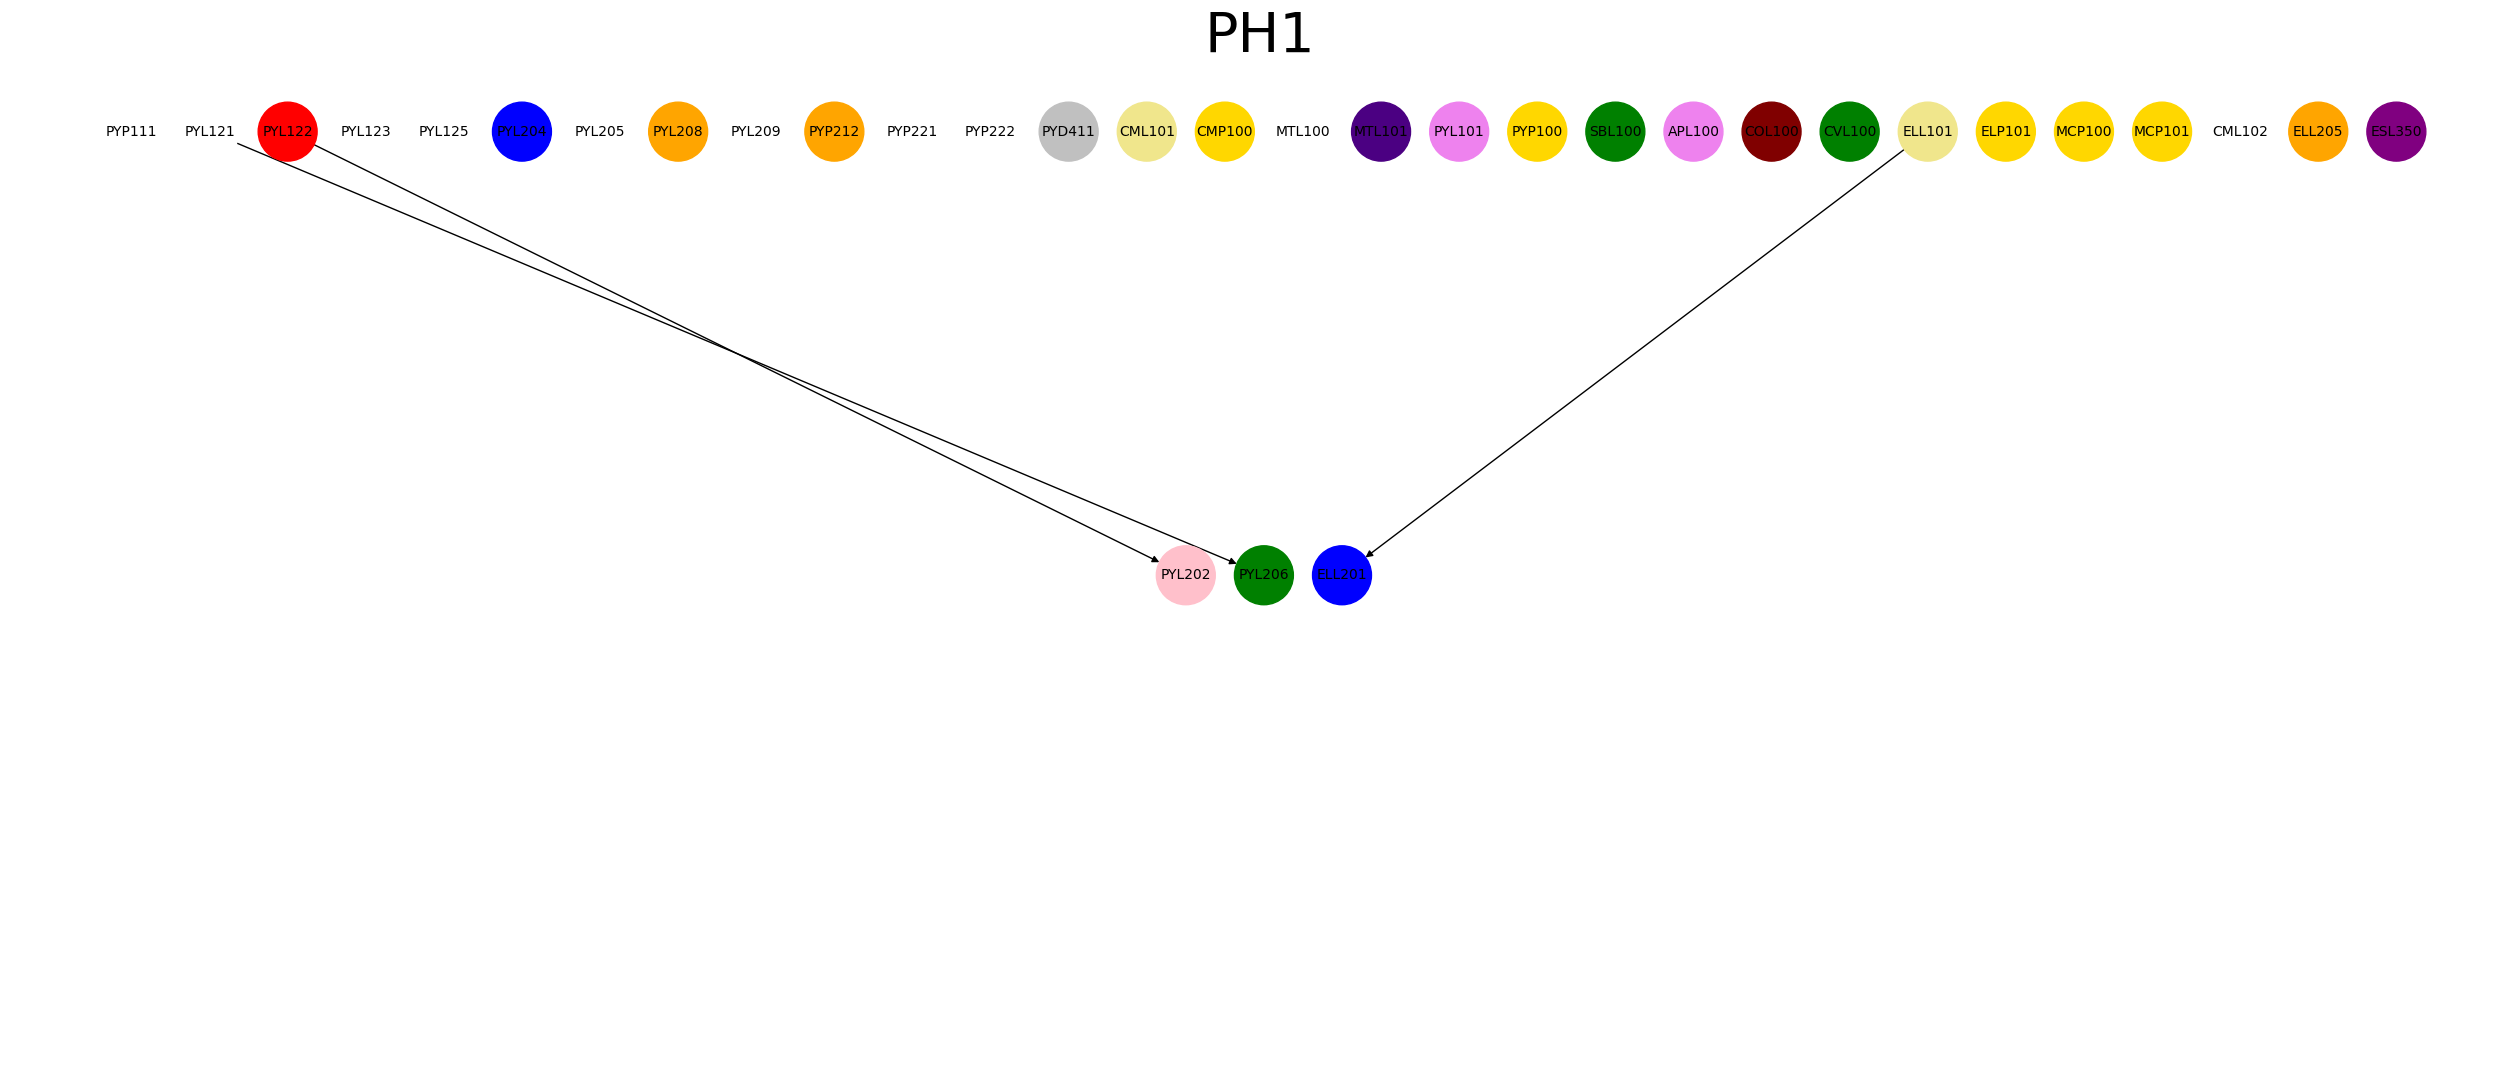

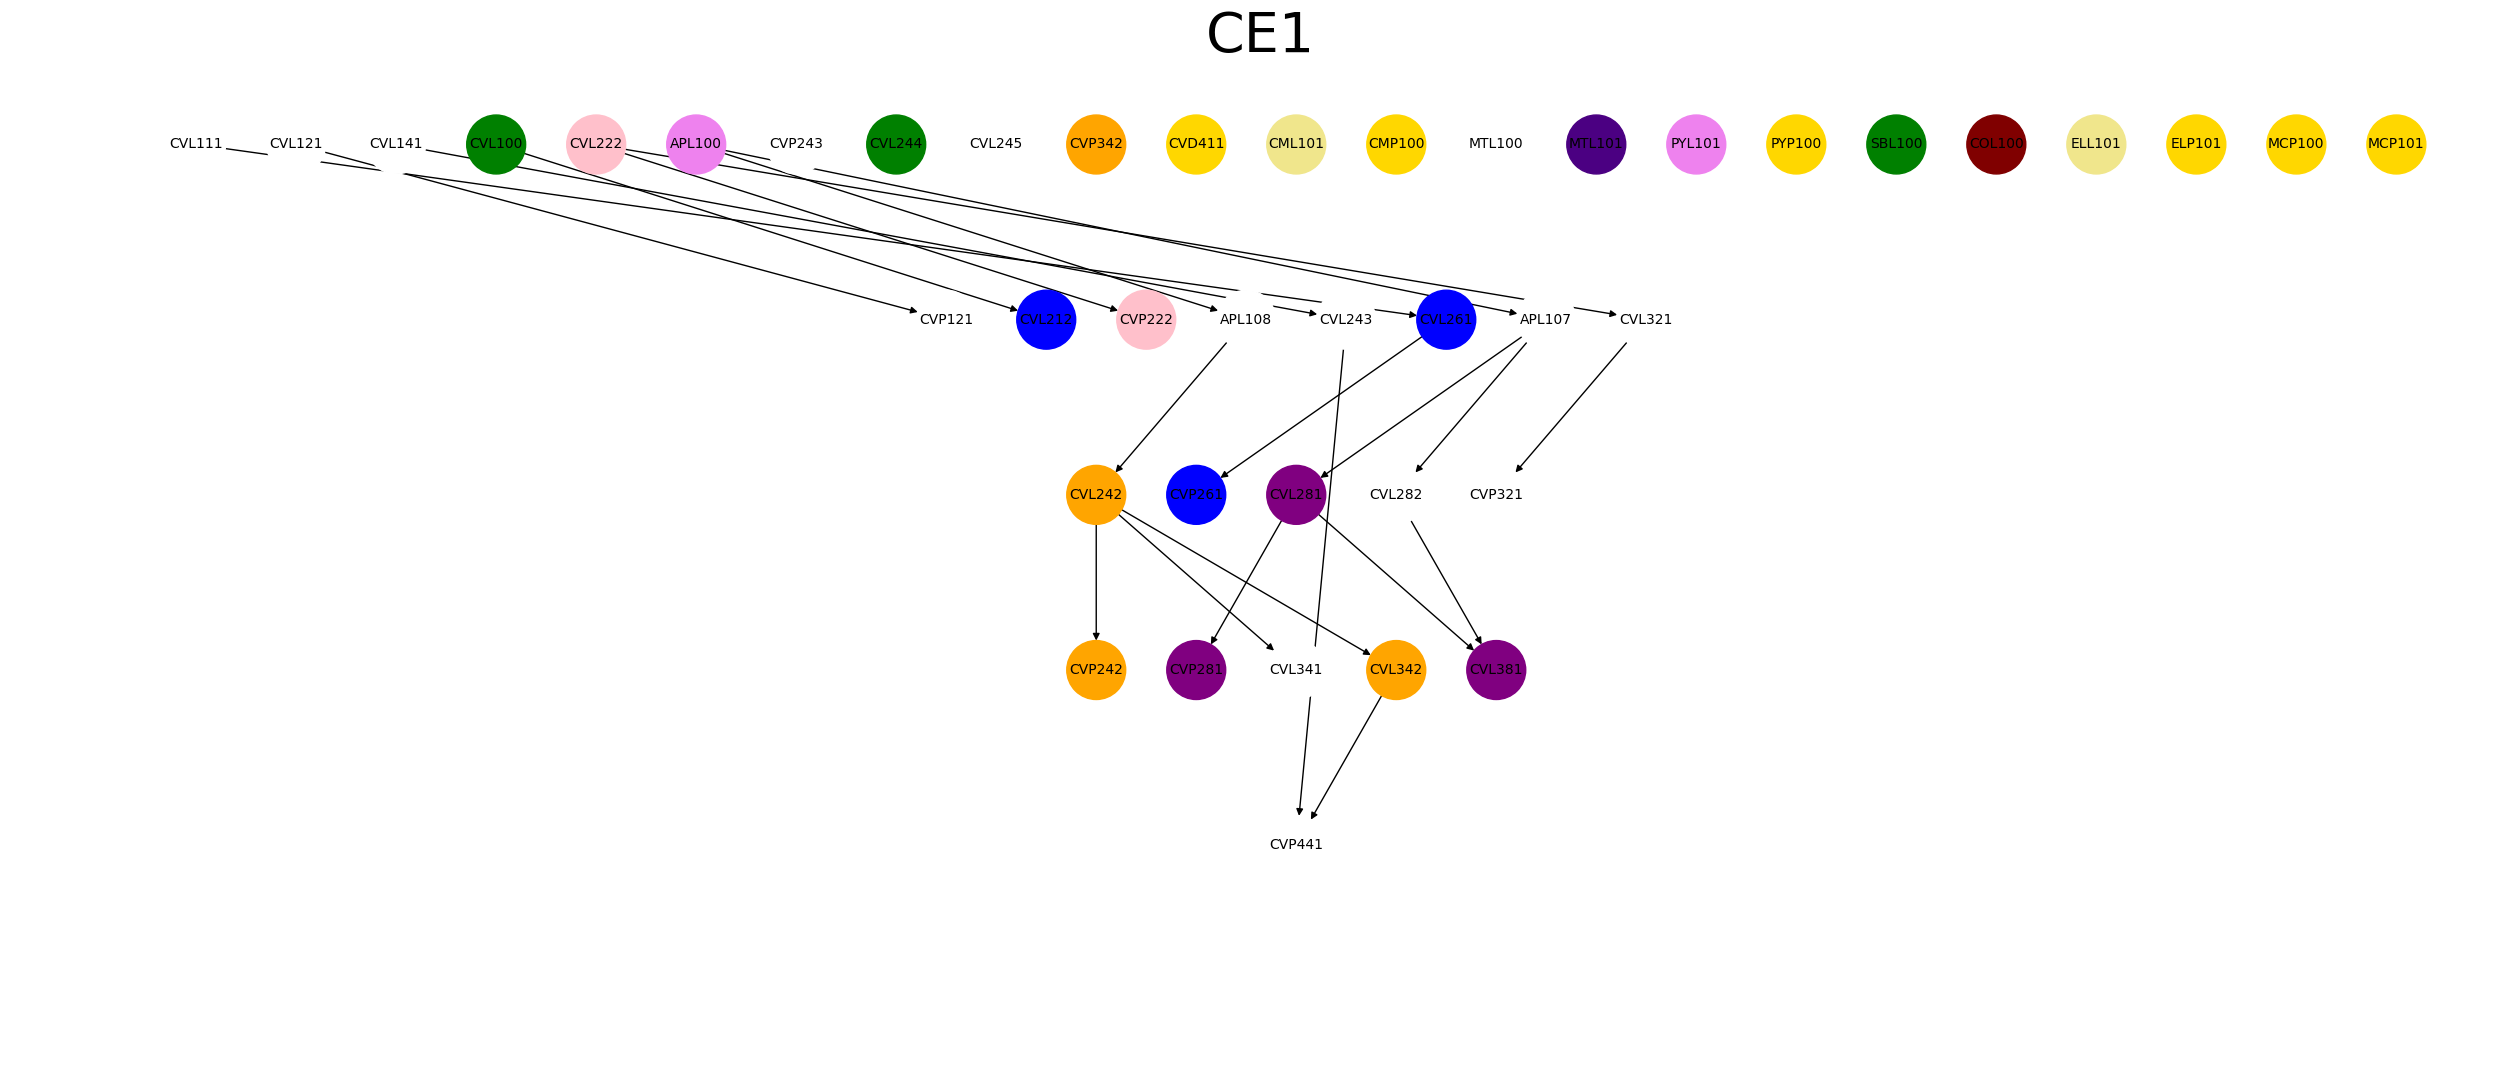

In [15]:
def combine(dep):
  colour={"Departmental Core":"red",": Basic Sciences":"lightblue","Institute Core: Engineering Arts and Sciences":"lightgreen","Programme-Linked Basic":"yellow"}
  ls=[]
  gcolour=[]
  for a in loc[dep]:
    ls+=loc[dep][a]
  gcolour=add_cour(ls)
  return (ls,gcolour)
def get_edges(ls,dep):
  edges=[]
  for a in ls:
    for b in cpre_req[a]:
      if(b in ls):
        edges.append((b,a))
  return edges
import networkx as nx
import matplotlib.pyplot as plt
import pydot
def print_hasse(dep):
    G = nx.DiGraph()
    all_cour, _ = combine(dep)
    G.add_nodes_from(all_cour)
    edges = get_edges(all_cour, dep)
    G.add_edges_from(edges)

    hierarchy = {}  # A dictionary to store hierarchy levels for nodes
    max_hierarchy = 0
    def cal_hier(hierarchy,node,depth=0):
      hierarchy_level = 0
      if(G.predecessors==[]):
        hierarchy[node]=0
        return
      for neighbor in G.predecessors(node):
        if neighbor in all_cour and depth<6:
          if neighbor not in hierarchy:
            cal_hier(hierarchy,neighbor,depth+1)
          hierarchy_level = max(hierarchy_level, hierarchy[neighbor] + 1)
      hierarchy[node]=hierarchy_level
    # Determine the hierarchy level for each node based on prerequisites
    for node in all_cour:
        if node not in hierarchy:
          cal_hier(hierarchy,node)
        max_hierarchy=max(max_hierarchy,hierarchy[node])

    # Create a list of nodes for each hierarchy level
    rows = [[] for _ in range(max_hierarchy + 1)]
    for node, level in hierarchy.items():
        rows[level].append(node)

    # Create a Hasse diagram with adjusted horizontal and vertical gaps
    plt.figure(figsize=(25, 10))
    pos = {}
    y_offset = 0
    horizontal_gap = 1  # Increase this value to increase horizontal gap
    vertical_gap = 0.2    # Decrease this value to decrease vertical gap
    for row in rows:
        row_width = len(row)
        x_offset = -horizontal_gap * row_width / 2
        for node in row:
            pos[node] = (x_offset, -vertical_gap * y_offset)
            x_offset += horizontal_gap
        y_offset += 0.01

    # Draw the graph
    nx.draw(G, pos, with_labels=True,node_color=_, node_size=1800, font_size=10, arrows=True)
    plt.title(dep,fontsize=40)
    plt.show()
for x in departments:
  print_hasse(x)